First we load data and have a quick looks at the structure. 

In [1]:
import pandas
data = pandas.read_csv(r'C:\Users\martinX1\Dropbox\projects\PredictingClicks\transactions.tsv', sep='\t', header=0)
data.head()

,transaction.value,gender,store.type
0,33.80,Male,Metro
1,7.02,Male,Superstore
2,335.88,Female,Extra
3,79.02,Male,Superstore
4,354.15,Male,Metro


Let's make sure there are no missing values

In [2]:
data.isnull().sum()

transaction.value    0
gender               0
store.type           0
dtype: int64

Some basic statistics about numeriv values. We can spot quite high standard deviation and max value. 

In [3]:
data.describe()

,transaction.value
count,2000.000000
mean,286.176050
std,4042.830224
min,0.460000
25%,22.127500
50%,47.275000
75%,173.665000
max,150032.000000


To have some intuition about values in our dataset we plot each column. 
We can strait ahead spot that transaction.value has some extraordinary values. We will have to deal with it later. 

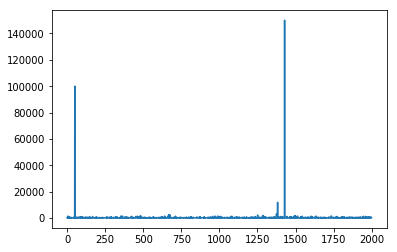

In [4]:
%matplotlib inline 
data['transaction.value'].plot()

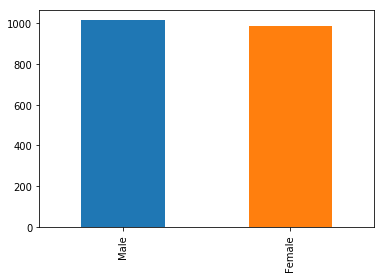

In [5]:
data['gender'].value_counts().plot(kind='bar')

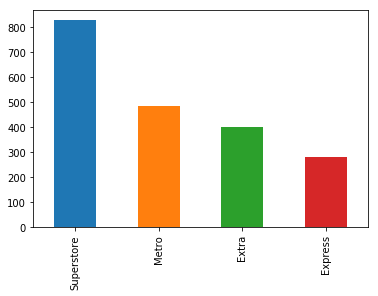

In [6]:
data['store.type'].value_counts().plot(kind='bar')

gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: transaction.value, dtype: object

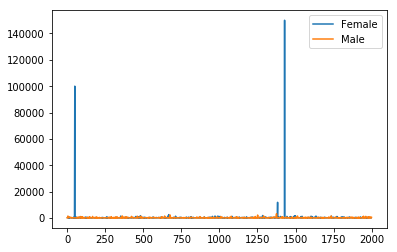

In [7]:
data.groupby('gender')['transaction.value'].plot(legend=True)

store.type
Express       AxesSubplot(0.125,0.125;0.775x0.755)
Extra         AxesSubplot(0.125,0.125;0.775x0.755)
Metro         AxesSubplot(0.125,0.125;0.775x0.755)
Superstore    AxesSubplot(0.125,0.125;0.775x0.755)
Name: transaction.value, dtype: object

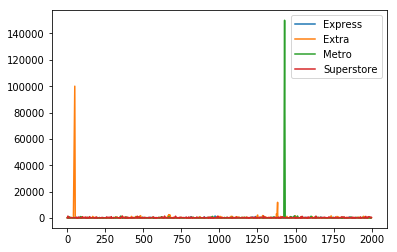

In [9]:
data.groupby('store.type')['transaction.value'].plot(legend=True)

Let's now focus on out transaction.value

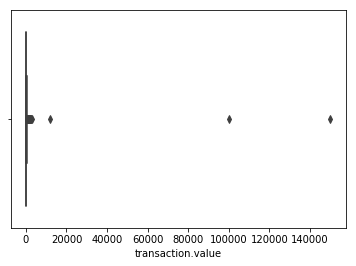

In [8]:
import seaborn
seaborn.boxplot(x=data['transaction.value'])

import matplotlib.pyplot
matplotlib.pyplot.show()

Let's try to test the outlayers with Z-score. We assume the data has normal distribution.

"The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured."

In [10]:
import scipy.stats
import numpy 

z = numpy.abs(scipy.stats.zscore(data['transaction.value']))
print(z)

[0.0624412  0.06906693 0.01229742 ... 0.05864835 0.06681299 0.02907699]


In most common cases the threshold of 3 can do the job, let's then try to select the values that have z-score beond that threshold. 

We can see that for threshold = 3 we suspect 2 outliers, and below for threshold = 2 we have 3 outliers.

In [11]:
threshold = 3
data.iloc[numpy.where(z > threshold)]

,transaction.value,gender,store.type
50,100000.0,Female,Extra
1428,150032.0,Female,Metro


In [12]:
threshold = 2
data.iloc[numpy.where(z > threshold)]

,transaction.value,gender,store.type
50,100000.00,Female,Extra
1382,11840.25,Female,Extra
1428,150032.00,Female,Metro


The Q-test assumes normal distribution, which is hard to assude for small samples. Here, were testing values for 30 data points. Anyway, we do the test just to see the results. 

The reference Q value for a significance level of 95% and 30 data points is 0.29.

From the results we see that the smallest transaction value 0.46 and four highest transaction valus 150032.00, 100000.00, 100000.00, 3180.76 can be considered outliers. 

In [13]:
def q_test(dataset):
    q_ref = 0.29  # the reference Q value for a significance level of 95% and 30 data points
    q_stat = (dataset[1] - dataset[0])/(dataset[-1] - dataset[0])
    
    if q_stat > q_ref:
        print("Since our Q-statistic is {} and {} > {}, we have evidence that "
              "the point {} IS an outlier to the data.".format(q_stat, q_stat, q_ref, dataset[0]))
    else:
        print("Since our Q-statistic is {} and {} < {}, we have evidence that "
              "the point {} is NOT an outlier to the data.".format(q_stat, q_stat, q_ref, dataset[0]))

In [14]:
data.sort_values('transaction.value').head()

,transaction.value,gender,store.type
140,0.46,Male,Extra
1704,2.54,Male,Extra
953,2.57,Male,Extra
1989,2.59,Female,Extra
975,2.65,Male,Extra


In [15]:
data.sort_values('transaction.value',ascending=False).head()

,transaction.value,gender,store.type
1428,150032.00,Female,Metro
50,100000.00,Female,Extra
1382,11840.25,Female,Extra
1375,3180.76,Male,Extra
667,2502.39,Female,Extra


In [18]:
q_test(data.sort_values('transaction.value').head(30)[-30:]['transaction.value'].values.tolist())

Since our Q-statistic is 0.4007707129094412 and 0.4007707129094412 > 0.29, we have evidence that the point 0.46 IS an outlier to the data.


In [17]:
q_test(data.sort_values('transaction.value').head(31)[-30:]['transaction.value'].values.tolist())

Since our Q-statistic is 0.009493670886075887 and 0.009493670886075887 < 0.29, we have evidence that the point 2.54 is NOT an outlier to the data.


In [16]:
q_test(data.sort_values('transaction.value',ascending=False).head(30)[-30:]['transaction.value'].values.tolist())

Since our Q-statistic is 0.33617156145280247 and 0.33617156145280247 > 0.29, we have evidence that the point 150032.0 IS an outlier to the data.


In [21]:
q_test(data.sort_values('transaction.value',ascending=False).head(31)[-30:]['transaction.value'].values.tolist())

Since our Q-statistic is 0.8921094035235994 and 0.8921094035235994 > 0.29, we have evidence that the point 100000.0 IS an outlier to the data.


In [20]:
q_test(data.sort_values('transaction.value',ascending=False).head(32)[-30:]['transaction.value'].values.tolist())

Since our Q-statistic is 0.8117904032473529 and 0.8117904032473529 > 0.29, we have evidence that the point 11840.25 IS an outlier to the data.


In [19]:
q_test(data.sort_values('transaction.value',ascending=False).head(33)[-30:]['transaction.value'].values.tolist())

Since our Q-statistic is 0.33745050440734636 and 0.33745050440734636 > 0.29, we have evidence that the point 3180.76 IS an outlier to the data.


In [23]:
q_test(data.sort_values('transaction.value',ascending=False).head(34)[-30:]['transaction.value'].values.tolist())

Since our Q-statistic is 0.160672218471003 and 0.160672218471003 < 0.29, we have evidence that the point 2502.39 is NOT an outlier to the data.


We can try to select an interquartile range (range between the first and the third quartiles). It considers datapoints outside of either 1.5 times the IQR below the first quartile or 1.5 times the IQR above the third quartile to be an outlier. This method is pointing quite a lot of anomalies in our case.

In [22]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = numpy.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return numpy.where((ys > upper_bound) | (ys < lower_bound))

len(data.iloc[outliers_iqr(data['transaction.value'])])

227

Finally, we try LocalOutlierFactor. The results highlly depends on the contamination parameter. Given, t eprevious charts, we can assune the contamination is quite low hence, we can try value 0.002. 

In [24]:
import sklearn.neighbors

clf = sklearn.neighbors.LocalOutlierFactor(n_neighbors=100, contamination=0.002)
pred = clf.fit_predict(data['transaction.value'].values.reshape(-1, 1) )
inliers_idx = numpy.where(pred==1)
data.iloc[numpy.where(pred==-1)]

,transaction.value,gender,store.type
50,100000.00,Female,Extra
1375,3180.76,Male,Extra
1382,11840.25,Female,Extra
1428,150032.00,Female,Metro


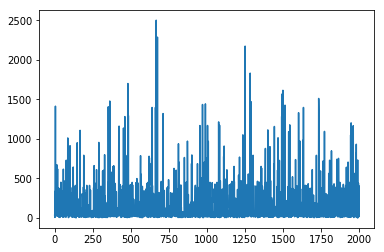

In [26]:
data.iloc[inliers_idx]['transaction.value'].plot()

gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: transaction.value, dtype: object

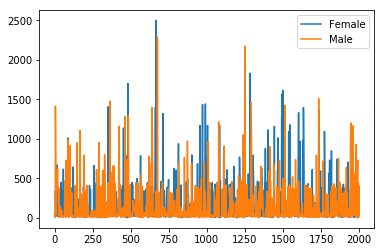

In [25]:
data.iloc[inliers_idx].groupby('gender')['transaction.value'].plot(legend=True)

store.type
Express       AxesSubplot(0.125,0.125;0.775x0.755)
Extra         AxesSubplot(0.125,0.125;0.775x0.755)
Metro         AxesSubplot(0.125,0.125;0.775x0.755)
Superstore    AxesSubplot(0.125,0.125;0.775x0.755)
Name: transaction.value, dtype: object

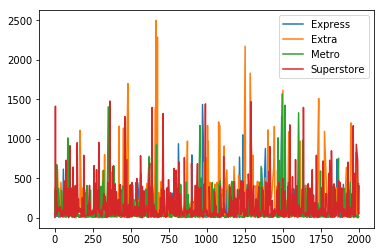

In [28]:
data.iloc[inliers_idx].groupby('store.type')['transaction.value'].plot(legend=True)

For the following computation we will use inliers detected by LocalOutlierFactor, as they are in line with the charts and basic statistilcal tests. 

# Q1) What is the average transaction value?

before removing the ourliers

In [27]:
data['transaction.value'].mean()

286.17605

In [29]:
data['transaction.value'].mode()[0]

15.67

In [30]:
data['transaction.value'].median()

47.275000000000006

after removing the ourliers

In [34]:
data.iloc[inliers_idx]['transaction.value'].mean()

153.95745991983966

In [33]:
data.iloc[inliers_idx]['transaction.value'].median()

47.18

In [31]:
data.iloc[inliers_idx]['transaction.value'].mode()[0]

15.67

We can clearlly see that mean is very sensitive for outliers, the value changes almost 2 times just by removing 4 data points.

Median (middle value) changes only slightlly, by 0.09, the reason for thai lies in the fact thet we removed very few data points.

Mode, as the most common value shoud not chage when removing outliers (especially very few data points), and it's confirmed in our case

# Q2) Is there significant difference between spend in different store types?

In [32]:
data.iloc[inliers_idx].groupby('store.type').mean().sort_values('transaction.value')

,transaction.value
store.type,
Express,86.349468
Metro,113.176605
Superstore,155.166490
Extra,248.901479


In [37]:
data.iloc[inliers_idx].groupby('store.type').median().sort_values('transaction.value')

,transaction.value
store.type,
Express,25.795
Metro,27.745
Superstore,71.500
Extra,109.550


We can clearlly observe difference between spend in different store types. in Express customers spend almost 3 times (given the mean) less than in Extra.  

In [36]:
data.iloc[inliers_idx].groupby('gender').mean().sort_values('transaction.value')

,transaction.value
gender,
Male,146.020099
Female,162.137060


In [35]:
data.iloc[inliers_idx].groupby('gender').median().sort_values('transaction.value')

,transaction.value
gender,
Male,42.73
Female,51.62


We can also notice thef females spend slightlly more tham males, arount 10% (given the mean) 